<a href="https://colab.research.google.com/github/Ash4dev/expert-octo-garbanzo/blob/main/melody_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!git clone https://github.com/Ash4dev/expert-octo-garbanzo.git

fatal: destination path 'expert-octo-garbanzo' already exists and is not an empty directory.


In [12]:
# set-ups for the music21 library

# enables music21 to render images of musical notes
print('installing lilypond...')
!apt-get install lilypond > /dev/null

# converts midi files to wav files into order to play them
print('installing fluidsynth...')
!apt-get install fluidsynth > /dev/null
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2

print('done!')

!fluidsynth --version
!lilypond --version

installing lilypond...
installing fluidsynth...
done!
FluidSynth version 1.1.9
Copyright (C) 2000-2018 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

FluidSynth 1.1.9
GNU LilyPond 2.18.2

Copyright (c) 1996--2012 by
  Han-Wen Nienhuys <hanwen@xs4all.nl>
  Jan Nieuwenhuizen <janneke@gnu.org>
  and others.

This program is free software.  It is covered by the GNU General Public
License and you are welcome to change it and/or distribute copies of it
under certain conditions.  Invoke as `lilypond --warranty' for more
information.



In [13]:
import music21
from IPython.display import Image, Audio

In [14]:
def show_score(music):
  display(Image(str(music.write('lily.png'))))

def play_score(music):
  filename = music.write('mid')
  !fluidsynth -ni font.sf2 $filename -F $filename\.wav -r 16000 > /dev/null
  display(Audio(filename + '.wav'))

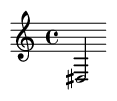

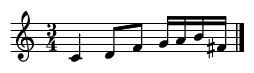

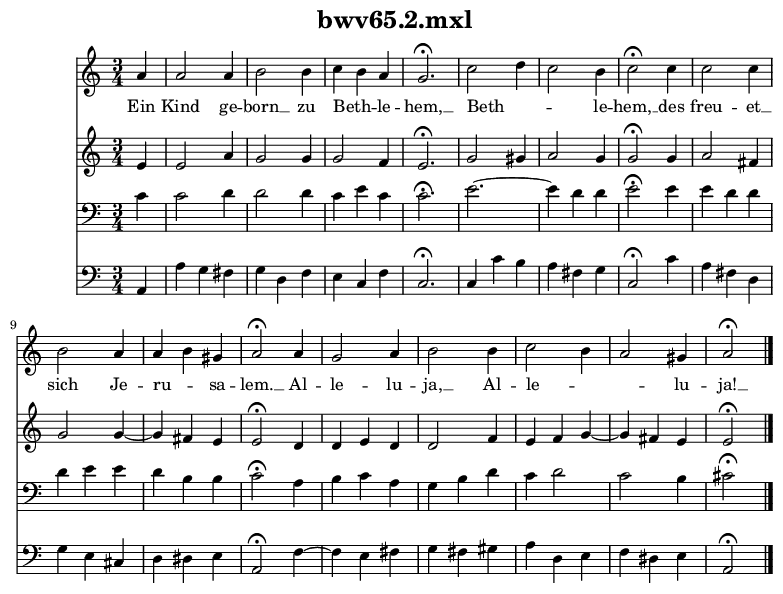

In [5]:
# proof of work
n = music21.note.Note('D#3')
n.duration.type = 'half'
show_score(n)
play_score(n)

littleMelody = music21.converter.parse('tinynotation: 3/4 c4 d8 f g16 a b f#')
show_score(littleMelody)
play_score(littleMelody)

bach = music21.corpus.parse('bach/bwv65.2.xml')
show_score(bach)
play_score(bach)

### Preprocessing steps

1. loading the data
2. rejecting the data that don't match our requirements
3. the ones that do, we want to transpose them to 2 keys: C_maj and A_min, so that the model can learn faster

In [15]:
import os
import music21

In [7]:
path_dir = '/content/expert-octo-garbanzo/essen/europa/deutschl'
# understanding os.walk
for dirpath, dirnames, filenames in os.walk(path_dir):
    print(dirpath, dirnames, filenames)

/content/expert-octo-garbanzo/essen/europa/deutschl ['fink', 'variant', 'kinder', 'erk', 'boehme', 'test', 'allerkbd', 'altdeu2', 'zuccal', 'dva', 'ballad', 'altdeu1'] ['CKSUM']
/content/expert-octo-garbanzo/essen/europa/deutschl/fink [] ['deut119.krn', 'deut087.krn', 'deut437.krn', 'deut191.krn', 'deut308.krn', 'deut542.krn', 'deut013.krn', 'deut014.krn', 'deut429.krn', 'deut095.krn', 'deut402.krn', 'deut461.krn', 'deut102.krn', 'deut348.krn', 'deut405.krn', 'deut264.krn', 'deut001.krn', 'deut019.krn', 'deut351.krn', 'deut029.krn', 'deut366.krn', 'deut086.krn', 'deut230.krn', 'deut189.krn', 'deut039.krn', 'deut262.krn', 'deut041.krn', 'deut133.krn', 'deut293.krn', 'deut531.krn', 'deut331.krn', 'deut342.krn', 'deut380.krn', 'deut100.krn', 'deut130.krn', 'deut146.krn', 'deut141.krn', 'deut211.krn', 'deut519.krn', 'deut529.krn', 'deut512.krn', 'deut162.krn', 'deut548.krn', 'deut557.krn', 'deut292.krn', 'deut283.krn', 'deut092.krn', 'deut499.krn', 'deut223.krn', 'deut487.krn', 'deut460.kr

In [37]:
# PATH_DIR = '/content/expert-octo-garbanzo/essen/europa/deutschl/test'

# # making multiple files load up successively

# def load_kern_files(path_dir):
#   songs = [] # store all the parsed score objects here

#   for dirpath, dirnames, filenames in os.walk(path_dir):
#     for file in filenames:
#       if file[-4:] == '.krn': # we only keep the kern data files
#         score = music21.converter.parse(os.path.join(dirpath, file)) # generates the score of the song
#         songs.append(score)
  
#   return songs

# songs = load_kern_files(PATH_DIR)

In [ ]:
# PATH_DIR = '/content/expert-octo-garbanzo/essen/europa/deutschl'

# # making multiple files load up successively

# def load_kern_files(path_dir):
#   songs = [] # store all the parsed score objects here

#   for dirpath, dirnames, filenames in os.walk(path_dir):

#     for file in filenames:
#       if file[-4:] == '.krn': # we only keep the kern data files
#         score = music21.converter.parse(os.path.join(dirpath, file)) # generates the score of the song
#         songs.append(score)
  
#     if len(dirnames) != 0: # helps us to generate scores of the files present in the directory
#       for dir in dirnames:
#         load_kern_files(os.path.join(dirpath, dir))

#   return songs

# songs = load_kern_files(PATH_DIR)

In [16]:
# making multiple files load up successively
def load_kern_files(path_dir):
  
  songs = [] # store all the parsed score objects here

  for dirpath, dirnames, filenames in os.walk(path_dir):
    for file in filenames:
      if file[-4:] == '.krn': # we only keep the kern data files
        try:
          score = music21.converter.parse(os.path.join(dirpath, file)) # generates the score of the song
        except:
          print(f"couldn't generate score for {file} in {dirpath}")

        songs.append(score)
  
    if len(dirnames) != 0: # helps us to generate scores of the files present in the directory
      for dir in dirnames:
        load_kern_files(os.path.join(dirpath, dir))

  return songs

In [20]:
PATH_DIR = '/content/expert-octo-garbanzo/essen'
songs = []

songs = load_kern_files(PATH_DIR)

In [21]:
len(songs)

8473

In [22]:
# https://stackoverflow.com/a/33245595/19817062

import pickle
your_data = songs

# Store data (serialize)
with open('scores.pickle', 'wb') as handle:
    pickle.dump(your_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

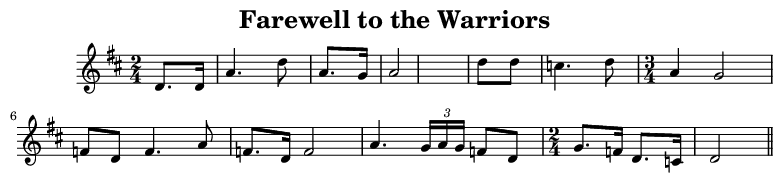

In [26]:
# proper way to test working: unit-testing
show_score(songs[0])
play_score(songs[0])

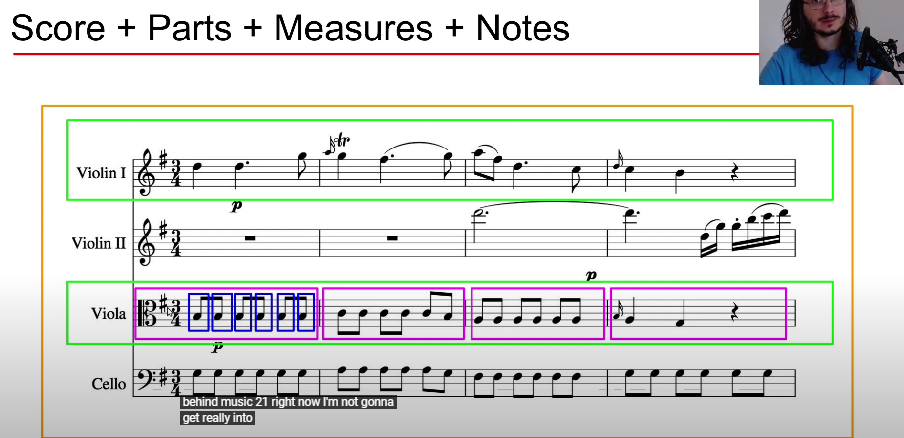

In [ ]:
acceptable_durations = [0.25, 0.5, 0.75, 1, 1.5, 2, 3, 4]

def has_acceptable_duration(song, acceptable_durations):
  for note in song.flat.notesandRests: # score is converted to a list of notes and rests
    if note.duration.quarterlength in acceptable_durations: # if 
      return True
    return False

In [ ]:
for song in songs:
  
  if not has_acceptable_duration(song, acceptable_durations):
    continue

  